# Overview 

**Part 1 - Basic workflow** 
- LogReg workflow (same workflow as LinReg)
    - Understanding the hyperparameter C

<hr style="border:2px solid pink"> </hr>


**Part 2 - LogReg evaluation** 


- Discussion about which metric is most import for our cancer data
- Evaluation metrics
    - Basic metrics
        - Accuracy
        - Precision
        - Recall
    - Fancy metrics
        - F1 
        - ROC AUC 
    
    
- Establishing baseline


- Make predictions on test data
    - Evaluate result


<hr style="border:2px solid pink"> </hr>

# Part 1 - Cancer data

In [2]:
import pandas as pd
df = pd.read_csv("cancer_clf.csv")
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_var
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [3]:
# target var: benign (0), malign (0)

In [4]:
df.shape

(569, 31)

## Let's build our pipeline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [8]:
target_var = "target_var"
X = df.drop(target_var, axis=1)
y = df[target_var]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [9]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## How does the model decide on the class assignment?

It calculates a probability for every data point what class it belongs to

In [16]:
import numpy as np
np.set_printoptions(suppress=True, precision=1)
pipe.predict_proba(X_train)

array([[0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [0.3, 0.7],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0.1, 0.9],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

And then by default chooses the class that has a higher than 50% probability

*Note: This threshold can be changed to influence the prediction*

In [17]:
pipe.predict(X_train)

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

## evaluation on training data

In [18]:
pipe.score(X_train, y_train)

0.9859154929577465

## part 1.2 | hyperparameter tuning

- Testing the logreg model with different values for "C"
- Smaller C-values specify stronger regularization

In [20]:
c_params = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for i in c_params:
    pipe = make_pipeline(StandardScaler(), LogisticRegression(C=i))
    pipe.fit(X_train, y_train)
    model_score = pipe.score(X_train, y_train)
    
    print(f"C:{i}| score:{model_score}")

C:0.0001| score:0.6431924882629108
C:0.001| score:0.8943661971830986
C:0.01| score:0.9530516431924883
C:0.1| score:0.9788732394366197
C:1| score:0.9859154929577465
C:10| score:0.9906103286384976


In [ ]:
# the deafult score is accuracy

In [21]:
# refit the model with C = 1
scaler = StandardScaler()
clf = LogisticRegression(C=1)
pipe = make_pipeline(scaler, clf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])

# Part 2 - Evaluating LogReg models

- Discussion about which metric is most import for our cancer data
- Basic Evaluation metrics
    - Accuracy score (default)
    - Precision score
    - Recall score
    
- Visualizing outcome with a confusion matrix

- Fancier Evaluation metrics
    - F1 score
    - AUC score


- Make predictions on test data
    - Evaluate outcome based on cost/benefit analysis
    

- False negatives are the worst in our cancer case

## Discussion about which metric is most import for our cancer data

In [22]:
# We decided to go with accuracy as our primary metrics

## The Accuracy Score
Is the default metric in sklearn.

$accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pipe.predict(X_train))

0.9859154929577465

## The Precision Score
$precicion = \frac{TP}{TP + FP}$

How many positive labels where correctly identified.

In [26]:
from sklearn.metrics import precision_score

y_true = y_train

y_pred = pipe.predict(X_train)

In [28]:
precision_score(y_true, y_pred)

0.9851851851851852

## The Recall Score
$recall = \frac{TP}{TP + FN}$

The recall is intuitively the ability of the classifier to find all the positive samples.

In [30]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.9925373134328358

## Visualizing with a Confusion matrix

/Users/oluwasegunadesanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


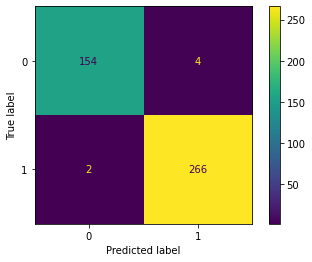

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe, X_train,y_train)

## F1-score

Formula for F1-Score

$F1 = 2 * \frac{precision * recall}{precision + recall}$

___

Summarising F1-score characteristics

- Takes both recall and precision into account

- In general, F1-score is a better metric for imbalanced class distributions
    - Imbalanced class distribution examples: Churn / Credit Fraud / Purchase

In [33]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.9888475836431226

## ROC AUC  Score ...

In [34]:
import numpy as np 
np.set_printoptions(suppress=True)

In [36]:
# we need to crreate a "y_score"

y_score = pipe.predict_proba(X_train)[:,1]

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_score)

0.9972369166824107

/Users/oluwasegunadesanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


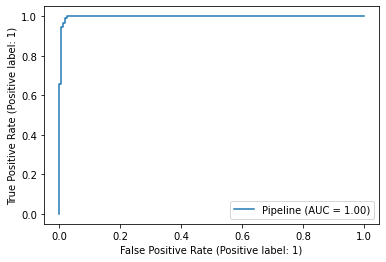

In [38]:
# visualizing roc curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipe, X_train, y_train)

# Final evaluation on test data

### Definining a baseline with a dummy Classifier

The stupid guesser. Our model has to beat at least this.

In [39]:
from sklearn.dummy import DummyClassifier

dummy= DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [40]:
dummy.score(X_test, y_test)

0.6223776223776224

In [41]:
baseline = dummy.score(X_test,y_test)

In [42]:
print(f"The baseline of beat is an acuracy of {baseline}")

The baseline of beat is an acuracy of 0.6223776223776224


### y_test vs y_pred

In [45]:
y_pred = pipe.predict(X_test)

In [48]:
test_score = accuracy_score(y_test, y_pred)

In [50]:
print(f"Test score: {test_score}")
print(f"The baseline of beat is an acuracy of {baseline}")

Test score: 0.9790209790209791
The baseline of beat is an acuracy of 0.6223776223776224


/Users/oluwasegunadesanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


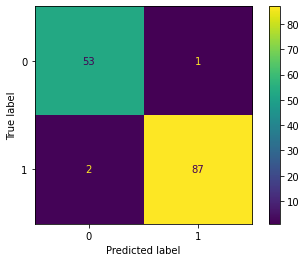

In [51]:
#visualizing outcome with confusion matrix

plot_confusion_matrix(pipe,X_test, y_test)